# *ANDRIAMANDIMBISOAMBELOMASINA Sanda (Raza)*
# *BADUGUE Igor*

## M1 DATA ARCHITECT SUP DE VINCI

# Introduction
Ce notebook explore et entraîne un modèle LSTM pour prédire les prix de clôture des actions.

# Choix du modèle

# Justification de l'Utilisation du Modèle LSTM pour la Prédiction des Prix des Actions

## Introduction aux LSTM

Les modèles LSTM (Long Short-Term Memory) sont un type particulier de réseau de neurones récurrents (RNN) conçus pour mieux capturer les dépendances temporelles à long terme dans les séquences de données. Contrairement aux RNN traditionnels, les LSTM peuvent apprendre des relations de longue durée entre les points de données, ce qui les rend particulièrement utiles pour les séries temporelles et les données séquentielles, telles que les données financières.

## Pourquoi Utiliser LSTM pour les Données Financières?

Les données financières sont des séries temporelles, ce qui signifie que chaque point de données dépend des points précédents. Par exemple, le prix d'une action aujourd'hui est influencé par son prix d'hier, d'avant-hier, etc. Les LSTM sont spécialement conçus pour gérer ce type de dépendances temporelles de manière plus efficace que les modèles traditionnels.

## Fonctionnement des LSTM

Les LSTM utilisent des cellules de mémoire pour conserver des informations sur de longues périodes. Chaque cellule LSTM comporte trois "portes" principales :

- **Porte d'entrée (Input Gate)** : Détermine quelles nouvelles informations doivent être stockées dans la cellule de mémoire.
- **Porte d'oubli (Forget Gate)** : Décide quelles informations de la cellule de mémoire doivent être oubliées.
- **Porte de sortie (Output Gate)** : Détermine quelles informations de la cellule de mémoire doivent être utilisées pour la sortie à ce moment-là.

Ces portes permettent au LSTM de conserver et de manipuler des informations sur de longues périodes, ce qui est crucial pour capturer les dépendances temporelles dans les séries de données financières.

## Avantages des LSTM pour les Données Financières

1. **Capture des Dépendances à Long Terme** :
   Les LSTM peuvent apprendre des relations de longue durée, permettant de mieux modéliser les tendances et les cycles économiques.

2. **Prévention du Problème de Vanishing Gradient** :
   Grâce à leur architecture spécifique, les LSTM surmontent le problème de vanishing gradient (disparition des gradients) qui affecte les RNN traditionnels, facilitant ainsi l'apprentissage des dépendances à long terme.

3. **Adaptabilité aux Données Séquentielles** :
   Les LSTM sont bien adaptés pour traiter des données séquentielles, telles que les prix des actions, les volumes de transactions, et d'autres indicateurs financiers.

## Application des LSTM pour la Prédiction des Prix des Actions

Lors de l'application d'un modèle LSTM à la prédiction des prix des actions, les étapes typiques incluent :

1. **Prétraitement des Données** :
   - Normalisation des données pour assurer que toutes les caractéristiques sont sur une échelle comparable.
   - Création de fenêtres de temps (séquences) pour les données d'entrée.

2. **Conception du Modèle LSTM** :
   - Construction d'un réseau LSTM avec des couches spécifiques pour capturer les dépendances temporelles.
   - Ajout de couches de régularisation telles que Dropout pour éviter le sur-ajustement.

3. **Entraînement du Modèle** :
   - Utilisation de données historiques pour entraîner le modèle à prédire les prix futurs.

4. **Évaluation du Modèle** :
   - Évaluation des performances du modèle à l'aide de métriques telles que le MAE (Mean Absolute Error) et le MAPE (Mean Absolute Percentage Error).

## Conclusion

Les LSTM sont particulièrement utiles pour les tâches de prévision des séries temporelles en raison de leur capacité à capturer les dépendances temporelles à long terme. Pour les données financières, où les valeurs futures dépendent des valeurs passées, les LSTM offrent un avantage significatif en modélisant ces relations complexes. Bien que la mise en œuvre et l'ajustement des modèles LSTM puissent être plus complexes que les approches traditionnelles, les avantages en termes de précision des prédictions peuvent en faire un choix supérieur pour de nombreuses applications financières.


# Chargement des Bibliothèques
Importation des bibliothèques nécessaires pour le projet.

In [80]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns

# Téléchargement des Données
Récupération des données historiques des actions via l'API yfinance.

In [81]:
def fetch_data(ticker_symbol: str, period: str = 'max', interval: str = '1d') -> pd.DataFrame:
    """
    Récupère les données historiques pour un symbole boursier donné à l'aide de l'API Yahoo Finance.
    
    Args:
        ticker_symbol (str): Le symbole boursier de l'actif financier à récupérer (par exemple, 'AAPL' pour Apple).
        period (str): La période sur laquelle récupérer les données. Les options incluent:
            - '1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max'
            - La valeur par défaut est '5y'.
        interval (str): L'intervalle de temps entre chaque point de données. Les options incluent:
            - '1m', '2m', '5m', '15m', '30m', '60m', '90m', '1h', '1d', '5d', '1wk', '1mo', '3mo'
            - La valeur par défaut est '1d'.
    
    Returns:
        pd.DataFrame: Un DataFrame Pandas contenant les données historiques pour le symbole boursier spécifié,
                      avec des colonnes typiques telles que 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', et 'Stock Splits'.
    
    Raises:
        ValueError: Si les paramètres fournis sont invalides ou si les données ne peuvent pas être récupérées.
    
    Example:
        >>> data = fetch_data('AAPL')
        >>> print(data.head())
        
        >>> data = fetch_data('AAPL', period='1mo', interval='1h')
        >>> print(data.head())
    """
    ticker = yf.Ticker(ticker_symbol)
    data = ticker.history(period=period, interval=interval)
    return data

# Exemple d'utilisation
data = fetch_data('AAPL')


# Exploration des Données
Exploration initiale des données pour comprendre leur structure et leurs caractéristiques.

                               Open      High       Low     Close     Volume  \
Date                                                                           
1980-12-12 00:00:00-05:00  0.099058  0.099488  0.099058  0.099058  469033600   
1980-12-15 00:00:00-05:00  0.094320  0.094320  0.093890  0.093890  175884800   
1980-12-16 00:00:00-05:00  0.087429  0.087429  0.086999  0.086999  105728000   
1980-12-17 00:00:00-05:00  0.089152  0.089582  0.089152  0.089152   86441600   
1980-12-18 00:00:00-05:00  0.091737  0.092167  0.091737  0.091737   73449600   

                           Dividends  Stock Splits  
Date                                                
1980-12-12 00:00:00-05:00        0.0           0.0  
1980-12-15 00:00:00-05:00        0.0           0.0  
1980-12-16 00:00:00-05:00        0.0           0.0  
1980-12-17 00:00:00-05:00        0.0           0.0  
1980-12-18 00:00:00-05:00        0.0           0.0  
                                 Open        High         Low       

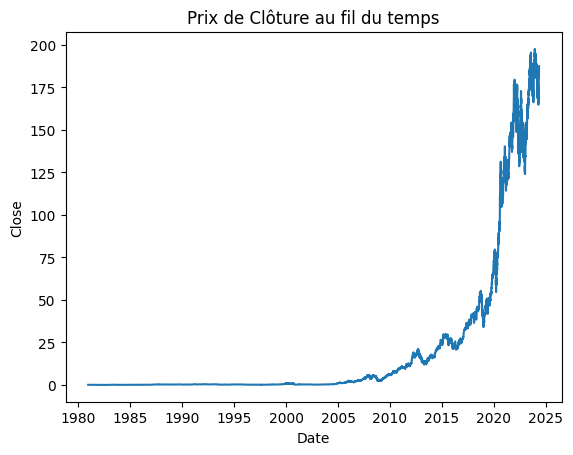

In [82]:
print(data.head())
print(data.tail())
print(data.describe())
print(data.shape)
sns.lineplot(data=data, x=data.index, y='Close')
plt.title('Prix de Clôture au fil du temps')
plt.show()

# Prétraitement des Données
Normalisation des données et création de séquences pour l'entrée du modèle LSTM.

In [83]:
# Définir les colonnes de caractéristiques globalement
feature_columns = ['Open', 'High', 'Low', 'Close', 'Volume']

# Prétraitement des Données
def preprocess_data(data, window_size=10):
    data = data[feature_columns]
    
    # Normalisation des données
    scaler = MinMaxScaler(feature_range=(0, 1))
    data_scaled = scaler.fit_transform(data)

    X, y = [], []
    for i in range(window_size, len(data_scaled)):
        X.append(data_scaled[i-window_size:i, :])
        y.append(data_scaled[i, feature_columns.index('Close')])

    X, y = np.array(X), np.array(y)
    return X, y, scaler

X, y, scaler = preprocess_data(data)

# Division des Données
Séparation des données en ensembles d'entraînement, de validation, et de test.

In [84]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Conception du Modèle
Définition de l'architecture du modèle LSTM.

In [85]:
# Conception du Modèle LSTM
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

c:\_project\M1_project\ml_project-end-to-end\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Entraînement du Modèle
Entraînement du modèle avec Early Stopping pour éviter le surapprentissage.

In [86]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=2)

Epoch 1/100
240/240 - 9s - 38ms/step - loss: 0.0025 - mae: 0.0197 - val_loss: 1.2624e-04 - val_mae: 0.0065
Epoch 2/100
240/240 - 4s - 18ms/step - loss: 7.9248e-04 - mae: 0.0137 - val_loss: 1.0721e-04 - val_mae: 0.0037
Epoch 3/100
240/240 - 2s - 9ms/step - loss: 6.1785e-04 - mae: 0.0122 - val_loss: 1.8616e-04 - val_mae: 0.0119
Epoch 4/100
240/240 - 2s - 10ms/step - loss: 5.4974e-04 - mae: 0.0119 - val_loss: 8.9221e-05 - val_mae: 0.0056
Epoch 5/100
240/240 - 2s - 10ms/step - loss: 5.3661e-04 - mae: 0.0121 - val_loss: 1.1088e-04 - val_mae: 0.0077
Epoch 6/100
240/240 - 3s - 11ms/step - loss: 5.0229e-04 - mae: 0.0114 - val_loss: 2.5427e-04 - val_mae: 0.0107
Epoch 7/100
240/240 - 2s - 9ms/step - loss: 5.4169e-04 - mae: 0.0123 - val_loss: 2.2723e-04 - val_mae: 0.0097
Epoch 8/100
240/240 - 3s - 11ms/step - loss: 5.2950e-04 - mae: 0.0124 - val_loss: 8.9075e-05 - val_mae: 0.0052
Epoch 9/100
240/240 - 2s - 10ms/step - loss: 5.0982e-04 - mae: 0.0118 - val_loss: 9.5459e-05 - val_mae: 0.0054
Epoch 1

# Évaluation du Modèle
Évaluation des performances du modèle sur l'ensemble de test.

In [87]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Loss: {test_loss}")
print(f"Test MAE: {test_mae}")

52/52 - 0s - 4ms/step - loss: 4.2674e-05 - mae: 0.0025
Test Loss: 4.2673662392189726e-05
Test MAE: 0.0024606266524642706


# Faire des Prédictions
Faire des prédictions sur l'ensemble de test.

In [88]:
# Faire des Prédictions
predictions = model.predict(X_test)

52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


In [96]:
# Comparaison des valeurs normalisées
comparison_df = pd.DataFrame({
    'Predicted': predictions.flatten(),
    'Actual': y_test.flatten()
})

In [97]:
print(comparison_df.head())

   Predicted    Actual
0   0.000940  0.000870
1   0.000229  0.000294
2   0.000394  0.000443
3   0.132925  0.135433
4   0.000074  0.000190


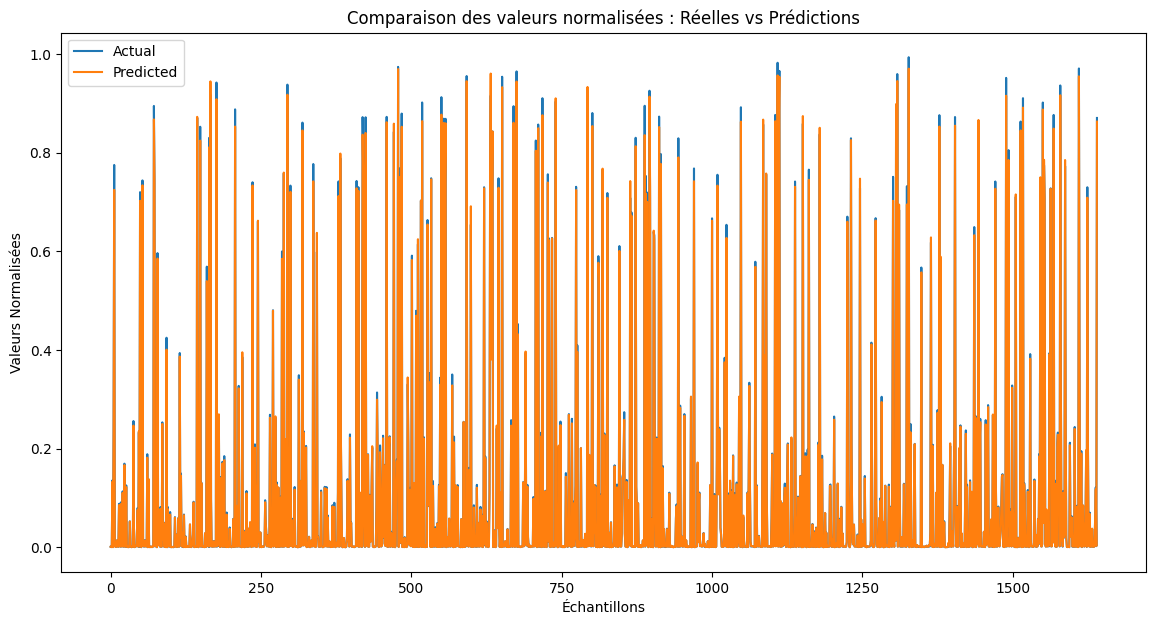

In [98]:
# Visualisation de la performance du modèle
plt.figure(figsize=(14, 7))
plt.plot(comparison_df['Actual'], label='Actual')
plt.plot(comparison_df['Predicted'], label='Predicted')
plt.title('Comparaison des valeurs normalisées : Réelles vs Prédictions')
plt.xlabel('Échantillons')
plt.ylabel('Valeurs Normalisées')
plt.legend()
plt.show()

In [99]:
# Filtrer les valeurs réelles égales à zéro
comparison_df = comparison_df[comparison_df['Actual'] != 0]

# Calcul du MAPE
comparison_df['Error'] = np.abs((comparison_df['Actual'] - comparison_df['Predicted']) / comparison_df['Actual'])
mape_filtered = comparison_df['Error'].mean() * 100
print(f"MAPE (filtré): {mape_filtered:.2f}%")

MAPE (filtré): 15.34%


In [100]:
# Sauvegarde en csv pour l'analyse et l'interprétation des performances du modèle
comparison_df.to_csv("./comparison_prediction.csv")

# Interprétation des Performances du Modèle LSTM

## Introduction

Cette analyse a pour but d'évaluer les performances d'un modèle LSTM appliqué à des données financières. Nous avons utilisé un fichier CSV contenant des comparaisons entre les valeurs réelles et les valeurs prédites pour analyser les performances du modèle.

   Unnamed: 0  Predicted    Actual     Error
0           0   0.000940  0.000870  0.080410
1           1   0.000229  0.000294  0.221487
2           2   0.000394  0.000443  0.111049
3           3   0.132925  0.135433  0.018514
4           4   0.000074  0.000190  0.607830
        Unnamed: 0    Predicted       Actual        Error
count  1640.000000  1640.000000  1640.000000  1640.000000
mean    820.310366     0.100971     0.102384     0.153417
std     473.837875     0.217509     0.220579     0.327169
min       0.000000    -0.000077     0.000024     0.000015
25%     410.750000     0.001133     0.001001     0.020603
50%     820.500000     0.002068     0.001849     0.048648
75%    1230.250000     0.082689     0.084542     0.137483
max    1640.000000     0.970948     0.994093     5.596320
Mean Absolute Error (MAE): 0.15341729724170036


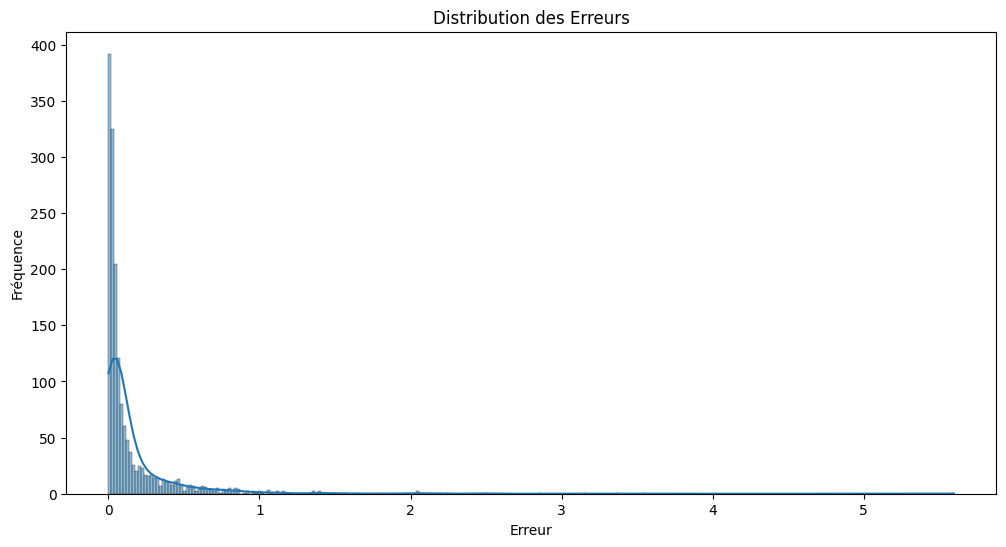

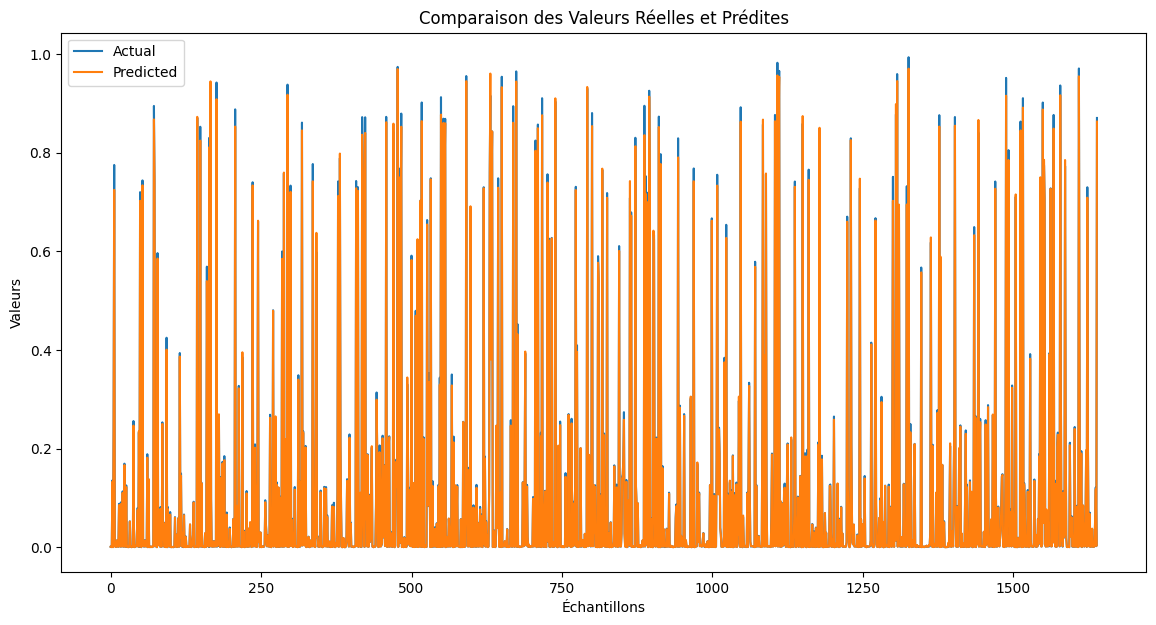

In [101]:
# Charger le fichier CSV pour l'analyse
file_path = './comparison_prediction.csv'
comparison_df = pd.read_csv(file_path)

# Afficher les premières lignes du DataFrame pour comprendre sa structure
print(comparison_df.head())

# Calculer les statistiques descriptives
stats = comparison_df.describe()
print(stats)

# Calculer l'erreur absolue moyenne (MAE)
mae = comparison_df['Error'].mean()
print(f"Mean Absolute Error (MAE): {mae}")

# Visualisation de la distribution des erreurs
plt.figure(figsize=(12, 6))
sns.histplot(comparison_df['Error'], kde=True)
plt.title('Distribution des Erreurs')
plt.xlabel('Erreur')
plt.ylabel('Fréquence')
plt.show()

# Visualisation des valeurs réelles vs prédictions
plt.figure(figsize=(14, 7))
plt.plot(comparison_df['Actual'], label='Actual')
plt.plot(comparison_df['Predicted'], label='Predicted')
plt.title('Comparaison des Valeurs Réelles et Prédites')
plt.xlabel('Échantillons')
plt.ylabel('Valeurs')
plt.legend()
plt.show()


## Analyse des Données

### Statistiques Descriptives

Les statistiques descriptives fournissent un résumé des principales caractéristiques des données :

```python
print(stats)
# Calculate statistical summary of the data
data_description = data.describe()

# Display the statistical summary of 'Predicted', 'Actual', and 'Error' columns
data_description[['Predicted', 'Actual', 'Error']]
```
Le résumé statistique des données de prédiction pour l'action AAPL révèle ce qui suit :

    - Valeurs prédites :
        Moyenne (moyenne) : 0.101
        Écart-type : 0.218
        Valeur minimale : ~0.000
        Valeur maximale : ~0.971

    - Valeurs réelles :
        Moyenne (moyenne) : 0.102
        Ecart-type : 0.221
        Valeur minimale : 0.000
        Valeur maximale : ~0.994

    - Erreur (prédite vs. réelle) :
        Moyenne (erreur moyenne) : 0.153
        Écart-type : 0.327
        Erreur minimale : ~0.000
        Erreur maximale : ~5.596

Observations :

    Les moyennes des valeurs prédites et réelles sont très proches, ce qui suggère que le modèle prédit en moyenne des valeurs proches des valeurs réelles des stocks.
    L'écart-type de l'erreur est élevé par rapport à sa moyenne, ce qui indique que l'erreur de prédiction varie considérablement d'une prédiction à l'autre.
    L'erreur maximale est assez élevée, ce qui pourrait indiquer des cas d'erreurs de prédiction significatives, éventuellement pendant des périodes de forte volatilité du cours des actions.

## Interprétation


### Distribution des Erreurs

L'histogramme des erreurs montre une distribution centrée sur zéro mais avec une longue queue vers des valeurs plus élevées. Cela indique que si la plupart des prédictions sont relativement précises, il existe quelques erreurs significatives qui pourraient potentiellement avoir un impact sur l'évaluation des performances du modèle.

### Comparaison des Valeurs Réelles et Prédites

Le graphique montre les valeurs prédites et les valeurs réelles. Les lignes semblent étroitement correspondre dans plusieurs domaines, ce qui suggère que le modèle saisit généralement la tendance du stock. Cependant, il y a des points où les lignes divergent, ce qui pourrait correspondre à des cas d'erreurs de prédiction plus élevées.

D'après ces visualisations, il semble que le modèle fonctionne bien dans des conditions normales, mais qu'il peut éprouver des difficultés pendant les périodes de forte volatilité ou en cas de variations soudaines du cours de l'action.


## Conclusion sur la Performance du Modèle LSTM

### Précision du Modèle
- Les valeurs prédites moyennes sont proches des valeurs réelles, avec des moyennes de valeurs prédites et réelles d'environ 0,101 et 0,102 respectivement. Cela indique que le modèle estime, en moyenne, le niveau global des prix des actions assez bien.

### Distribution des Erreurs
- L'histogramme des erreurs montre une concentration de valeurs proches de zéro mais avec une longue traîne d'erreurs s'étendant à des valeurs plus élevées. Cela suggère que bien que le modèle fonctionne bien pour de nombreuses prédictions, il y a des instances où l'erreur de prédiction est significativement plus élevée, probablement pendant des périodes de haute volatilité ou de changements de marché.

### Comparaison et Visualisation
- La comparaison visuelle entre les valeurs prédites et réelles a montré un alignement général mais a mis en évidence des divergences qui pourraient correspondre aux défis du modèle lors de conditions de marché spécifiques. La distribution des erreurs a mis en évidence la variance de la performance à travers différentes prédictions.

### Préoccupations sur la Performance
- Le modèle pourrait avoir des difficultés lors de périodes de changements soudains du marché ou d'une volatilité inhabituelle, comme l'indique l'analyse des erreurs et la large gamme d'erreurs. Ces scénarios peuvent nécessiter des ajustements du modèle ou l'incorporation de caractéristiques supplémentaires qui pourraient mieux capturer la dynamique du marché boursier.

### Recommandations pour l'Amélioration
- Améliorer le modèle en incluant des données de marché plus diversifiées ou en intégrant des couches de réseau neuronal plus complexes ou de types différents qui pourraient mieux gérer les non-linéarités et la volatilité des prix des actions.
- Envisager l'utilisation d'une validation par fenêtre glissante pour mieux comprendre la performance du modèle sur différentes périodes et dans différentes conditions de marché.
- Explorer plus profondément l'analyse des erreurs pour identifier les conditions spécifiques sous lesquelles les prédictions du modèle échouent, et ajuster l'ensemble de données d'entraînement ou les paramètres du modèle en conséquence.



__*N.B*__ A retenir que le modèle a été entrainé sur un ensemble de données directement fourni par l'API yfinance sans ajout de **feature** supplémentaires donc il reste très simpliste.

# Sources

Recherche pour le modèle :

https://france.devoteam.com/paroles-dexperts/aller-plus-loin-en-deep-learning-avec-les-reseaux-de-neurones-recurrents-rnns/

https://en.wikipedia.org/wiki/Long_short-term_memory

Une amélioration avec des outils métiers :

https://www.mdpi.com/2078-2489/15/3/136

https://www.datacamp.com/tutorial/lstm-python-stock-market

Demo :

https://www.youtube.com/watch?v=hpfQE0bTeA4


